# Matching Contour Shapes

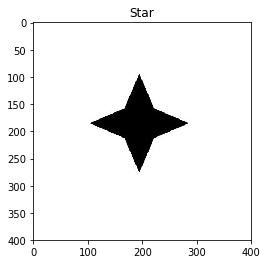

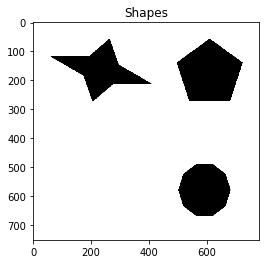

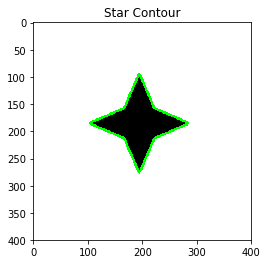

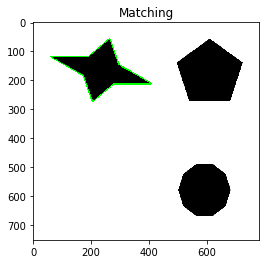

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

star = cv2.imread('../Data/Images/4star.jpg')
cv2.imshow('Star', star)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(star, cv2.COLOR_BGR2RGB))
plt.title('Star')
plt.show()

shapes = cv2.imread('../Data/Images/shapestomatch.jpg')
cv2.imshow('Shapes', shapes)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
plt.title('Shapes')
plt.show()

ret, thresh1 = cv2.threshold(cv2.cvtColor(star.copy(), cv2.COLOR_BGR2GRAY), 127, 255, 0)
ret, thresh2 = cv2.threshold(cv2.cvtColor(shapes.copy(), cv2.COLOR_BGR2GRAY), 127, 255, 0)


_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
star_contour = contours[1]
cv2.drawContours(star, [star_contour], -1, (0,255,0), 3)
cv2.imshow('Star_Contour', star)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(star, cv2.COLOR_BGR2RGB))
plt.title('Star Contour')
plt.show()


_, contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(shapes, contours, -1, (0,255,0), 3)
# cv2.imshow('Shapes_Contours', shapes)
# cv2.waitKey(0)

for c in contours:
    match = cv2.matchShapes(star_contour, c, 2, 0.0)
#     print(match)
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
cv2.drawContours(shapes, [closest_contour], -1, (0,255,0), 3)
cv2.imshow('Matching', shapes)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
plt.title('Matching')
plt.show()


cv2.destroyAllWindows()

# Resources 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_more_functions/py_contours_more_functions.html#contours-more-functions